In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import calendar
import numpy as np
import pandas as pd
from joblib import load

from helper import *

In [3]:
showings = load('../data/showings_extra_feature.joblib')
showings.replace(np.inf, 0, inplace=True)
genres = load('../data/genres.joblib')

In [4]:
week_of_release = showings.loc[showings.days_since_release < 10, ('dayofweek', 'tmdb_runtime', 'year', 'coverage')]

# Coverage by runtime for the week following the release

In [5]:
runtime = list(set(week_of_release.tmdb_runtime.unique().round()))
runtime.sort()

In [6]:
stats = dict()
for i in runtime:
    if np.isfinite(i):
        j = custom_round(i, base=20)
        if j not in stats:
            stats[j] = week_of_release.loc[week_of_release.tmdb_runtime.round() == i, 'coverage']
        else:
            stats[j].append(week_of_release.loc[week_of_release.tmdb_runtime.round() == i, 'coverage'])

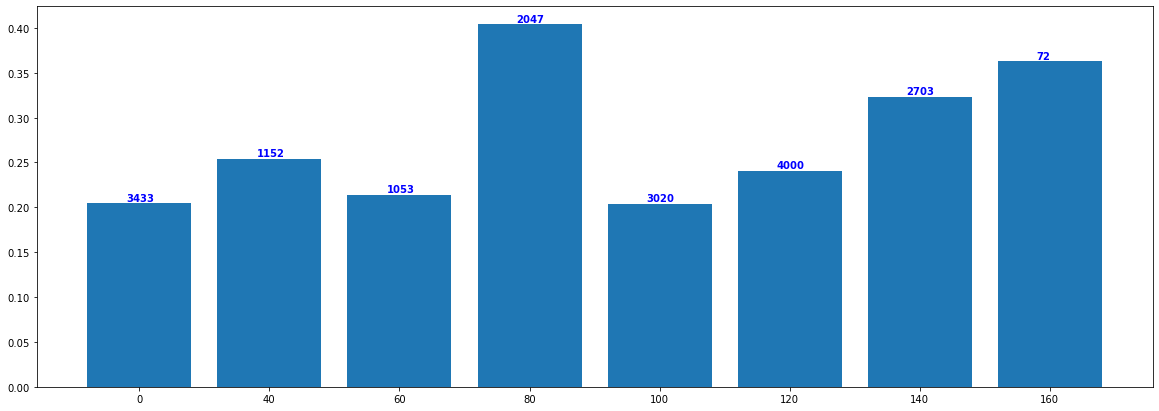

In [7]:
bar_plot(stats, w=20, h=7, r=0, d=0.1, min_cnt=10)

In [8]:
stats = dict()
for i in range(2007, 2021):
    stats[i] = dict()
    temp = week_of_release.loc[week_of_release.year == i]
    for k in runtime:
        if np.isfinite(k):
            j = custom_round(k, base=20)
            if j not in stats:
                stats[i][j] = temp.loc[temp.tmdb_runtime.round() == k, 'coverage']
            else:
                stats[i][j].append(temp.loc[temp.tmdb_runtime.round() == k, 'coverage'])

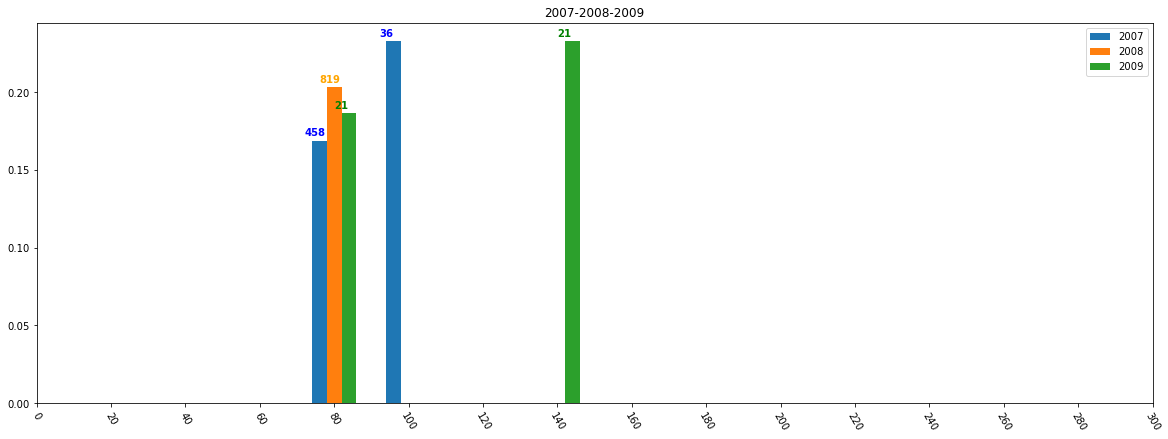

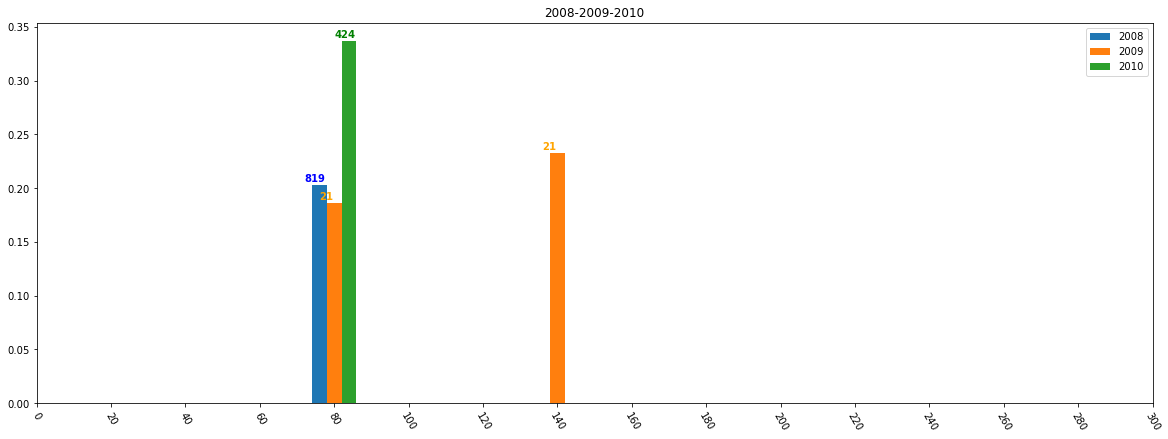

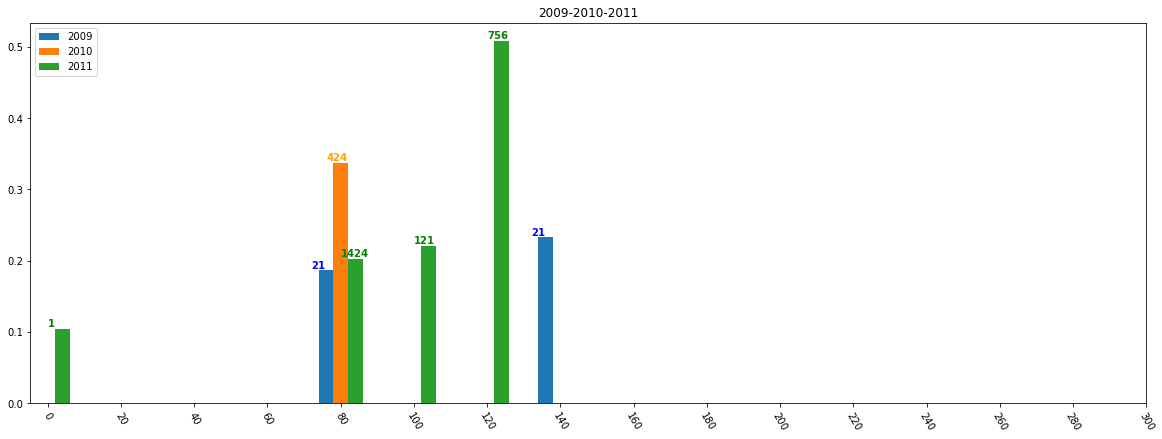

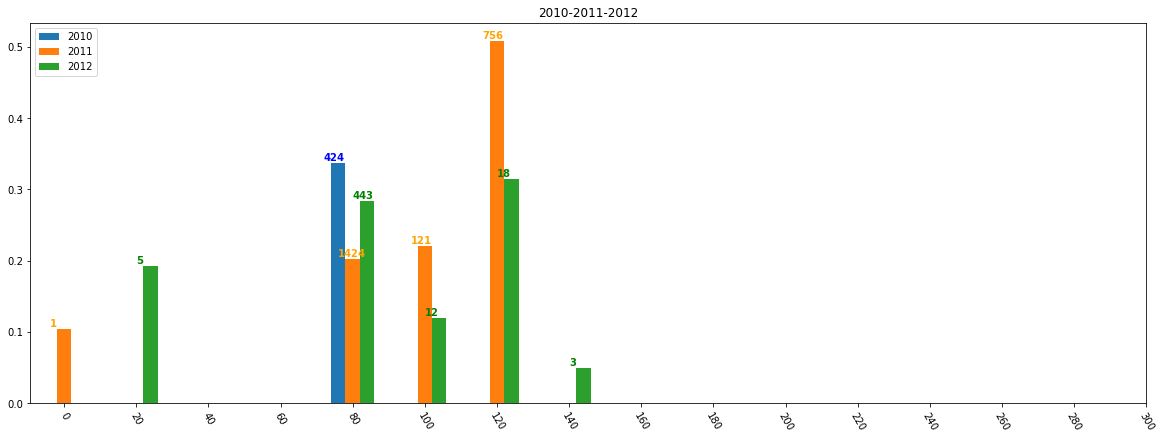

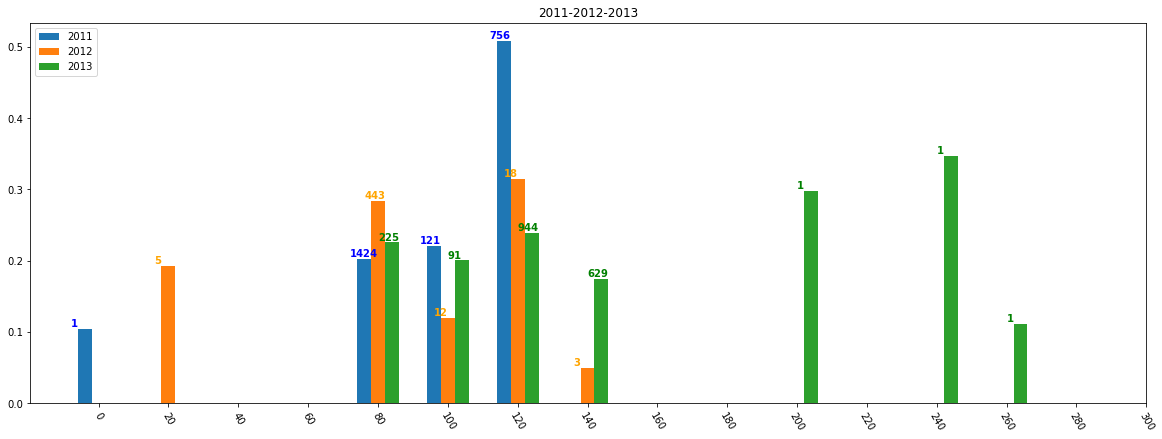

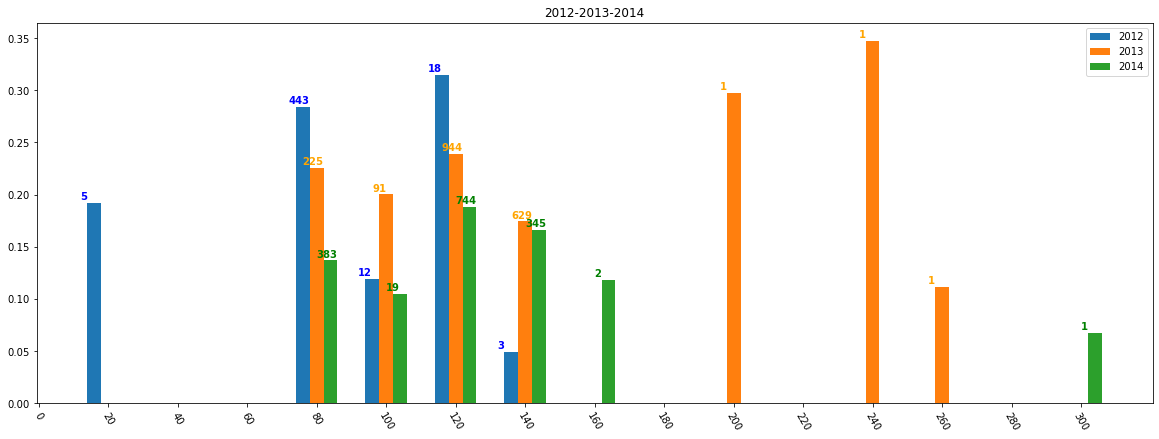

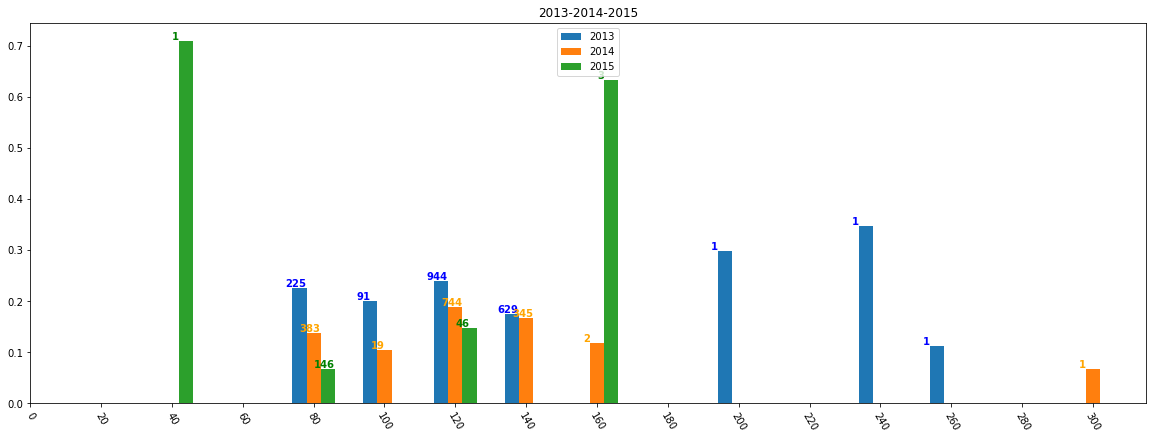

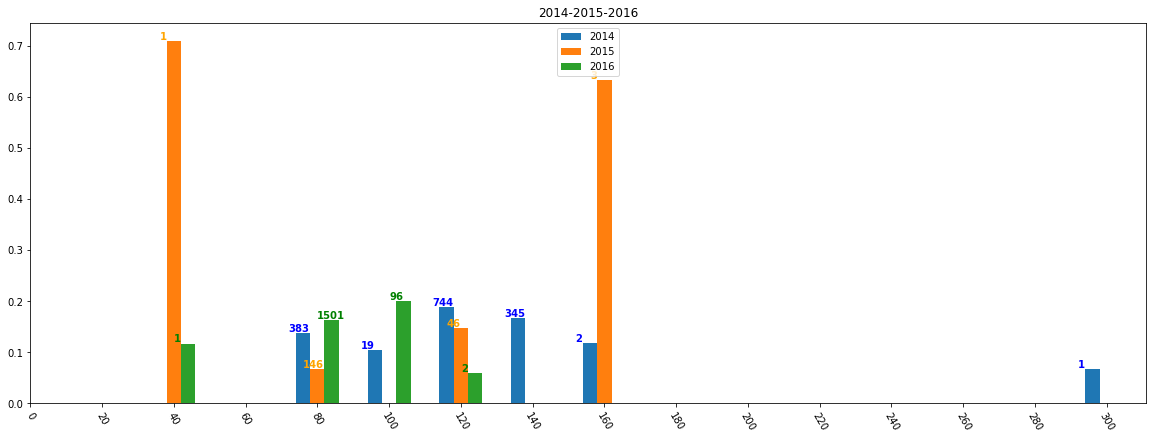

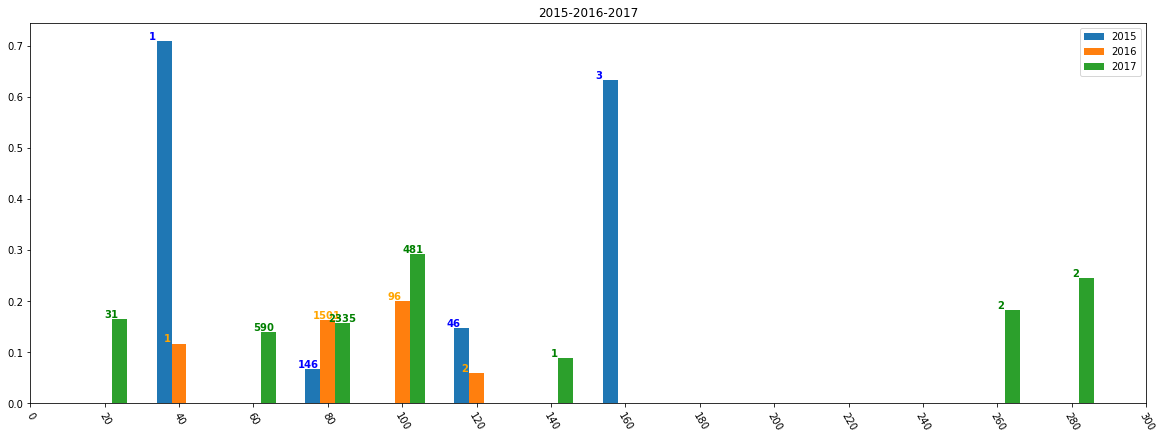

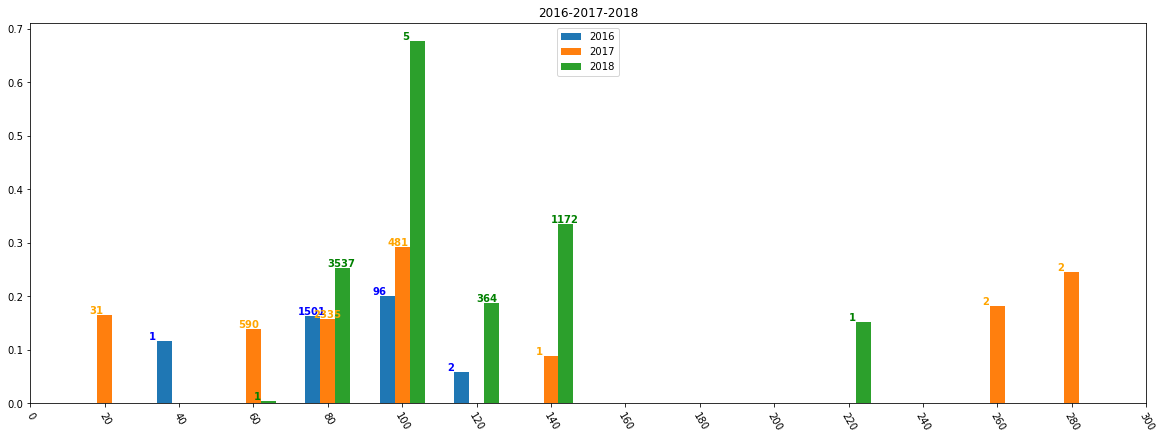

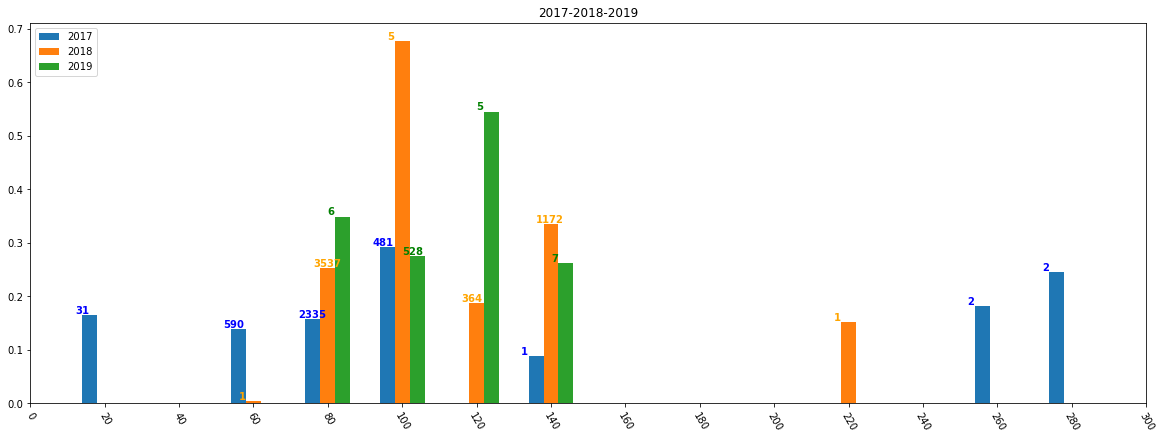

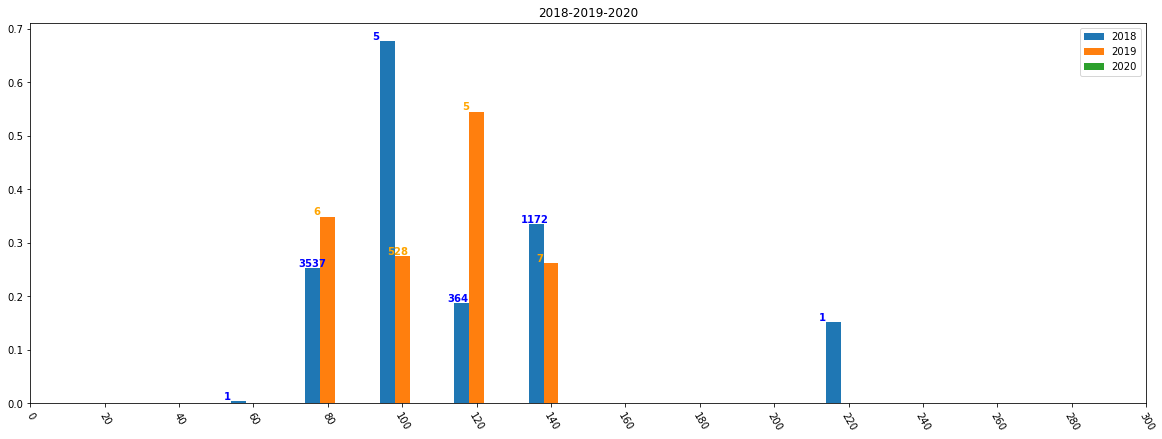

In [9]:
for year in stats:
    if year+2 == 2021: break
    three_bar_plot(stats[year], stats[year+1], stats[year+2],
                   title=str(year)+'-'+str(year+1)+'-'+str(year+2),
                   legend=(str(year), str(year+1), str(year+2)),
                   w=20, h=7, r=300, count=True, min_cnt=0)